In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cognifyz-technologies-tasks/Dataset .csv


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### 1. Data collecton and EDA

In [19]:
data = pd.read_csv('/kaggle/input/cognifyz-technologies-tasks/Dataset .csv')

In [20]:
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [34]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [21]:
print(data[['Longitude', 'Latitude']].describe())
print(data[['Longitude', 'Latitude']].isnull().sum())

         Longitude     Latitude
count  9551.000000  9551.000000
mean     64.126574    25.854381
std      41.467058    11.007935
min    -157.948486   -41.330428
25%      77.081343    28.478713
50%      77.191964    28.570469
75%      77.282006    28.642758
max     174.832089    55.976980
Longitude    0
Latitude     0
dtype: int64


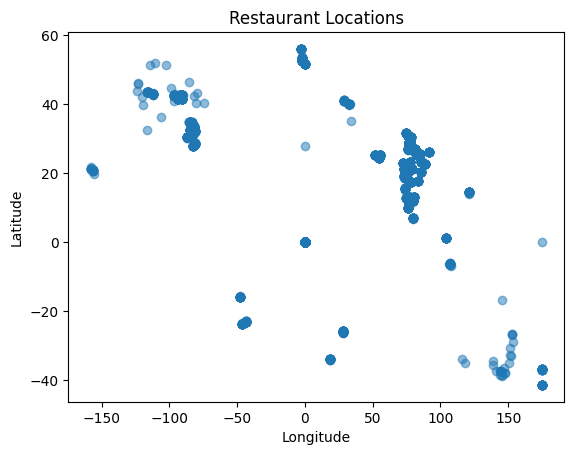

In [22]:
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5)
plt.title("Restaurant Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

###### Visualisation of map

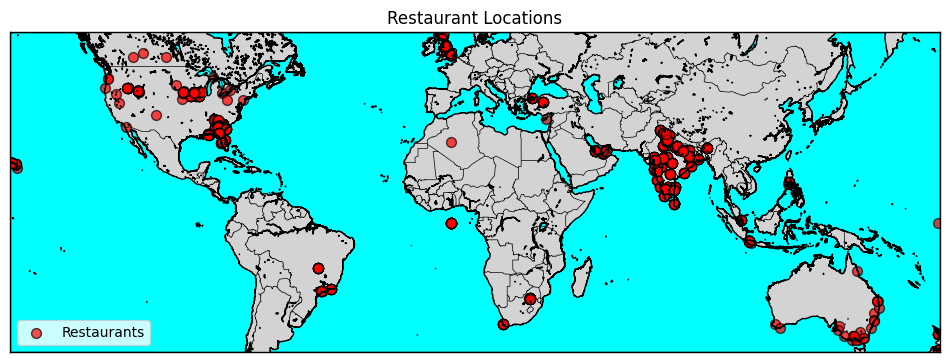

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Calculate the center of the map
center_lat = data['Latitude'].mean()
center_lon = data['Longitude'].mean()

# Initialize a Basemap
fig, ax = plt.subplots(figsize=(12, 8))
m = Basemap(projection='merc',
            llcrnrlat=data['Latitude'].min() - 0.5,
            urcrnrlat=data['Latitude'].max() + 0.5,
            llcrnrlon=data['Longitude'].min() - 0.5,
            urcrnrlon=data['Longitude'].max() + 0.5,
            resolution='i')

# Draw map boundaries and coastlines
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Convert latitude and longitude to map projection coordinates
x, y = m(data['Longitude'].values, data['Latitude'].values)

# Plot restaurant locations
scatter = m.scatter(x, y, c='red', alpha=0.7, edgecolor='k', s=50, label="Restaurants")

# Add legend and title
plt.legend(loc="lower left")
plt.title("Restaurant Locations")
plt.show()



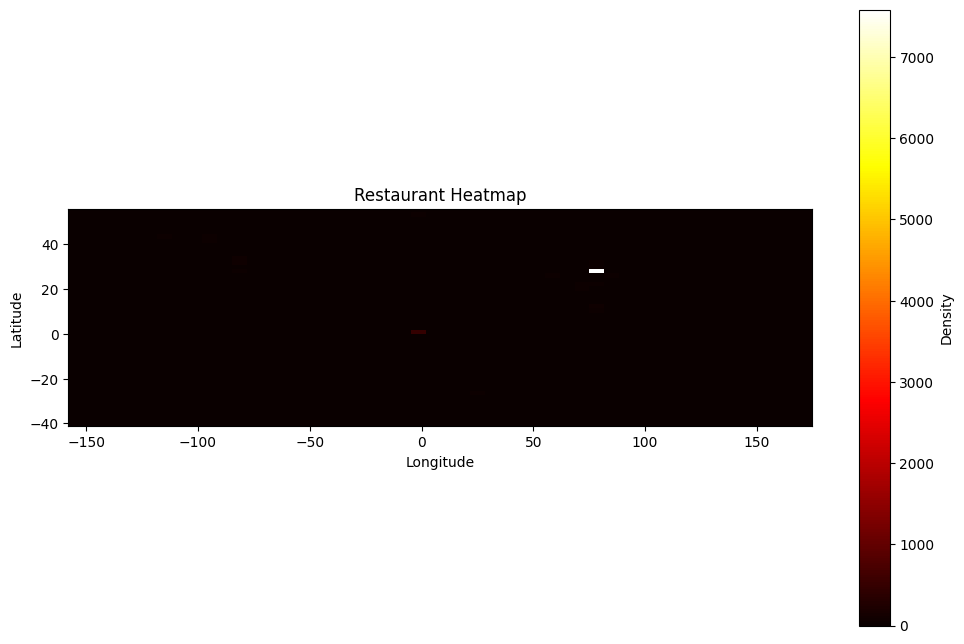

In [25]:
# Extract latitude and longitude data
latitudes = data['Latitude']
longitudes = data['Longitude']

# Create a 2D histogram (heatmap)
heatmap, xedges, yedges = np.histogram2d(longitudes, latitudes, bins=50)

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(
    heatmap.T, origin='lower', cmap='hot',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]
)

# Add labels and title
plt.colorbar(label="Density")
plt.title("Restaurant Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### 2. Grouping City or Locality

In [26]:
# Group restaurants by city or locality and count the number of restaurants
grouped_data = data.groupby('City')['Restaurant Name'].count().reset_index()
grouped_data.columns = ['City', 'Restaurant Count']

# Sort data by restaurant count in descending order
grouped_data = grouped_data.sort_values(by='Restaurant Count', ascending=False)

print(grouped_data.head())  # Display top cities with the most restaurants


         City  Restaurant Count
88  New Delhi              5473
50    Gurgaon              1118
89      Noida              1080
43  Faridabad               251
48  Ghaziabad                25


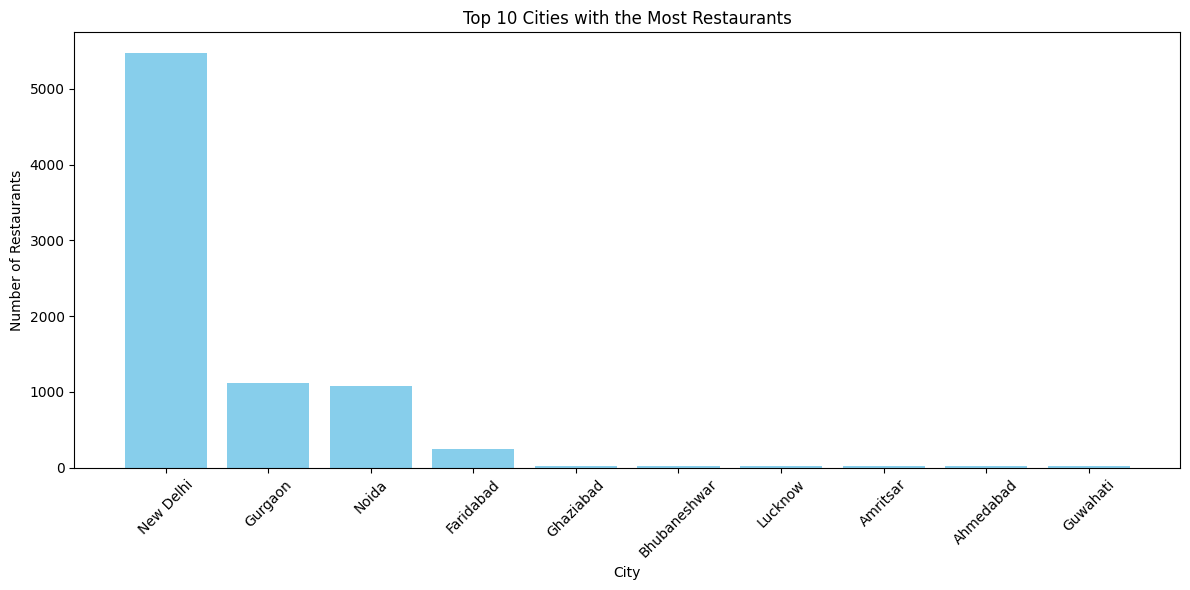

In [27]:
# Select top 10 cities/localities
top_cities = grouped_data.head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_cities['City'], top_cities['Restaurant Count'], color='skyblue')
plt.title("Top 10 Cities with the Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

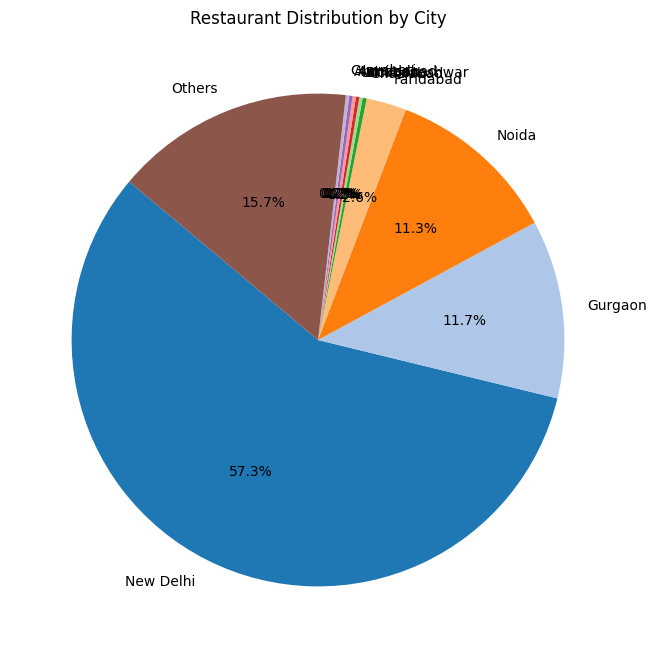

In [28]:
# Top 10 cities and "Others"
top_cities = grouped_data.head(10)
others = grouped_data['Restaurant Count'].iloc[10:].sum()

# Prepare data for pie chart
pie_data = list(top_cities['Restaurant Count']) + [others]
labels = list(top_cities['City']) + ['Others']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Restaurant Distribution by City")
plt.show()


### 3. Statistics of Aggregate raing, Cuisines etc

In [30]:
# Calculate the average rating by city
average_ratings = data.groupby('City')['Aggregate rating'].mean().reset_index()
average_ratings.columns = ['City', 'Average Rating']

# Sort by average rating in descending order
average_ratings = average_ratings.sort_values(by='Average Rating', ascending=False)

print(average_ratings.head())  # Display top cities with the highest average ratings


                 City  Average Rating
56         Inner City        4.900000
107       Quezon City        4.800000
73        Makati City        4.650000
95         Pasig City        4.633333
75   Mandaluyong City        4.625000


In [35]:
# Calculate average price range by city
average_price_range = data.groupby('City')['Price range'].mean().reset_index()
average_price_range.columns = ['City', 'Average Price Range']

# Sort by average price range
average_price_range = average_price_range.sort_values(by='Average Price Range', ascending=False)

print(average_price_range.head())  # Display cities with the highest average price ranges


                 City  Average Price Range
104         Princeton                  4.0
56         Inner City                  4.0
133  Vineland Station                  4.0
60       Johannesburg                  4.0
93          Panchkula                  4.0


In [40]:
# Combine statistics into one DataFrame
city_summary = (
    data.groupby('City')
    .agg({
        'Aggregate rating': 'mean',  # Average rating
        'Price range': 'mean',  # Average price range
    })
    .reset_index()
)

city_summary.columns = ['City', 'Average Rating', 'Average Price Range']

# Sort by average rating as an example
city_summary = city_summary.sort_values(by='Average Rating', ascending=False)

print(city_summary.head())


                 City  Average Rating  Average Price Range
56         Inner City        4.900000                 4.00
107       Quezon City        4.800000                 3.00
73        Makati City        4.650000                 3.00
95         Pasig City        4.633333                 3.00
75   Mandaluyong City        4.625000                 3.75


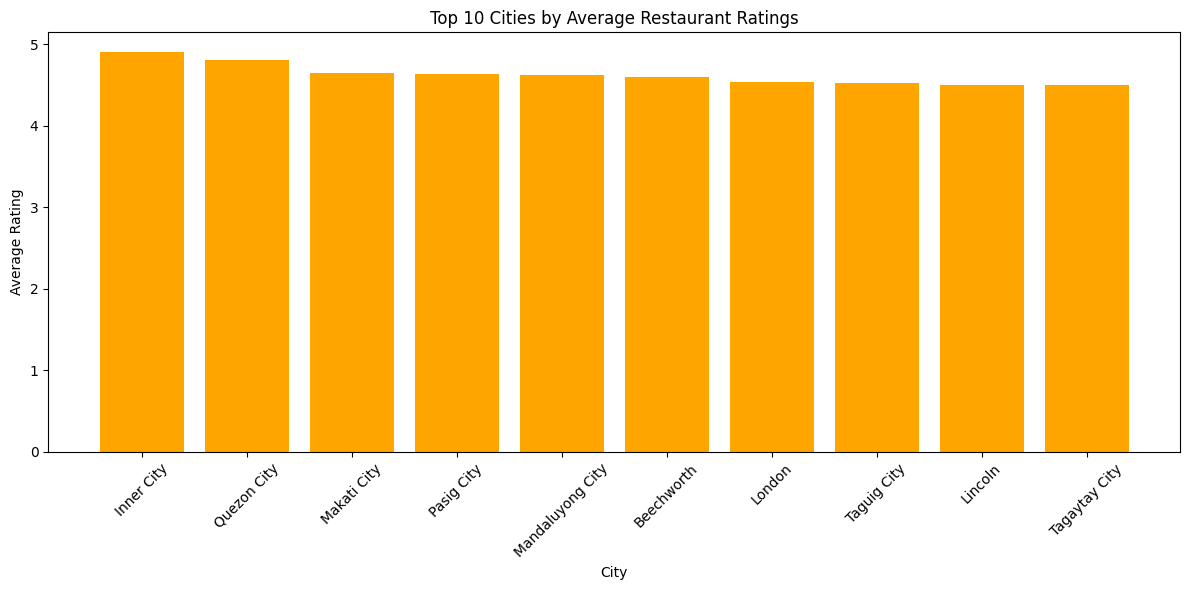

In [41]:

# top 10 cities by average rating
top_rated_cities = city_summary.sort_values(by='Average Rating', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_rated_cities['City'], top_rated_cities['Average Rating'], color='orange')
plt.title("Top 10 Cities by Average Restaurant Ratings")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights and Patterns Related to Restaurant Locations

After analyzing the data, here are some potential insights and patterns you might observe related to restaurant locations. You can further refine these based on the specific context of your data:

1. High Concentration in Urban Areas
Observation: Restaurants tend to cluster in major urban areas or city centers, as they typically have higher population density and foot traffic.
Insight: This suggests that restaurants prioritize locations with high visibility and accessibility for customers.
2. Correlation Between Ratings and Affluent Areas
Observation: Areas with higher average incomes or upscale neighborhoods often have restaurants with higher aggregate ratings and price ranges.
Insight: These areas might attract premium restaurants that invest in better service, ambiance, and food quality.
3. Diversity of Cuisines in Cosmopolitan Cities
Observation: Larger cities or tourist hubs show greater diversity in cuisines (e.g., international cuisines like Italian, Chinese, or Mediterranean).
Insight: Diverse culinary offerings cater to the multicultural population and tourists in these areas.
4. Heatmap Patterns
Observation: Heatmaps reveal distinct clusters where restaurants are heavily concentrated, such as popular downtown streets or near landmarks.
Insight: These areas are hotspots for dining, and new restaurants might find success here despite competition.
5. Affordability Trends
Observation: Peripheral or suburban areas often feature restaurants with lower price ranges, catering to local, family-oriented diners.
Insight: These areas prioritize affordability and local cuisine over luxury dining